In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

## 平均一天喝幾杯含糖飲料以上未來易得糖尿病?

In [2]:
data=pd.read_csv('LogR_data.csv')

In [3]:
data

,Name,Amount,Result
0,Jack,0,0
1,Amy,1,1
2,John,3,1
3,Anna,2,1
4,Nick,1,0
5,Jocelyn,1,0
6,Bob,0,0
7,Candy,0,1
8,Lily,1,0
9,Grace,0,0


In [4]:
X=data['Amount'].values
y=data['Result'].values

In [5]:
X

array([0, 1, 3, 2, 1, 1, 0, 0, 1, 0, 2, 3, 3, 2, 2, 0, 2, 3, 2, 3],
      dtype=int64)

In [6]:
X.shape

(20,)

In [10]:
X=X.reshape(-1,1)

In [11]:
X.shape

(20, 1)

## $$logit(Odds)=\ln (\frac{p}{1-p}) = w_0+w_1X$$

In [12]:
model=linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
print('coef', model.coef_)
print('intercept',model.intercept_)

coef [[0.62478435]]
intercept [-0.79369052]


In [14]:
w1=float(model.coef_)
w0=float(model.intercept_)

In [16]:
def sigmoid(x,wo,w1):
    ln_odds=wo+w1*x
    return 1/(1+np.exp(-ln_odds))

## $$S(X)=\frac{1}{1+e^{-X}}$$

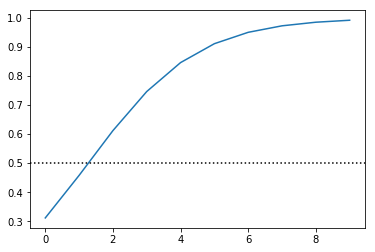

In [17]:
x=np.arange(0,10,1)
s_x=sigmoid(x,w0,w1)
plt.plot(x,s_x)
plt.axhline(y=0.5, ls='dotted', color='k')

In [18]:
model.predict([[0],[1],[2],[3]])

array([0, 0, 1, 1], dtype=int64)

In [19]:
X

array([[0],
       [1],
       [3],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [3],
       [3],
       [2],
       [2],
       [0],
       [2],
       [3],
       [2],
       [3]], dtype=int64)

In [20]:
model.predict_proba(X)

array([[0.68862321, 0.31137679],
       [0.54212644, 0.45787356],
       [0.25338066, 0.74661934],
       [0.38796409, 0.61203591],
       [0.54212644, 0.45787356],
       [0.54212644, 0.45787356],
       [0.68862321, 0.31137679],
       [0.68862321, 0.31137679],
       [0.54212644, 0.45787356],
       [0.68862321, 0.31137679],
       [0.38796409, 0.61203591],
       [0.25338066, 0.74661934],
       [0.25338066, 0.74661934],
       [0.38796409, 0.61203591],
       [0.38796409, 0.61203591],
       [0.68862321, 0.31137679],
       [0.38796409, 0.61203591],
       [0.25338066, 0.74661934],
       [0.38796409, 0.61203591],
       [0.25338066, 0.74661934]])

In [21]:
model.score(X,y)

0.75

# 多元分類

In [22]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split

C:\Users\tinah\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
iris=datasets.load_iris()

In [24]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [25]:
X=iris.data
y=iris.target

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [29]:
model=linear_model.LogisticRegression()

In [30]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
model.predict(X_test)

array([1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1,
       2, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1,
       2])

In [32]:
model.predict_proba(X_test)

array([[3.95797803e-02, 5.96432330e-01, 3.63987890e-01],
       [8.09804558e-01, 1.89960916e-01, 2.34525627e-04],
       [4.22497817e-02, 6.12738068e-01, 3.45012150e-01],
       [2.95121210e-03, 4.90130909e-01, 5.06917879e-01],
       [8.49635333e-01, 1.50181501e-01, 1.83166663e-04],
       [9.62137621e-03, 6.78863663e-01, 3.11514960e-01],
       [8.43440477e-01, 1.56470929e-01, 8.85944831e-05],
       [4.57946886e-02, 5.28616374e-01, 4.25588937e-01],
       [1.81860448e-03, 2.72965597e-01, 7.25215799e-01],
       [8.21430923e-01, 1.78428916e-01, 1.40161253e-04],
       [7.80478497e-01, 2.19405743e-01, 1.15759970e-04],
       [7.69995109e-04, 3.23668297e-01, 6.75561708e-01],
       [1.32400688e-03, 2.73264151e-01, 7.25411842e-01],
       [9.27730129e-01, 7.22575292e-02, 1.23422367e-05],
       [8.65797760e-01, 1.34021483e-01, 1.80757179e-04],
       [4.61151552e-03, 3.43530452e-01, 6.51858032e-01],
       [1.28613803e-03, 3.31210278e-01, 6.67503584e-01],
       [8.53824355e-01, 1.46150

In [33]:
model.score(X_train,y_train)

0.9428571428571428

In [34]:
model.score(X_test,y_test)

0.9333333333333333